### Student Information
Name: Catherine Tao

Student ID: X1140008

GitHub ID: sleepingpandazzz25

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [152]:
# Import

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import helpers.data_mining_helpers as dmh

nltk.download("punkt")

# Get data from CSV
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
# Only keep text, label, subjectivity, and polarity 
df = df[["text", "label", "subjectivity", "polarity", "datetime", "subreddit"]].copy()

# Log first 5 elements
df.head(50)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/catherinetao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,label,subjectivity,polarity,datetime,subreddit
0,Calls on retards,-1.0,1.000000,-0.900000,2025-04-11 17:29:56,wallstreetbets
1,Stunt as in like why did they even make a big ...,0.0,0.177778,0.083333,2025-04-12 1:12:19,wallstreetbets
2,Seeing lots of red in the ticker.,0.0,0.000000,0.000000,2025-04-10 15:09:41,StockMarket
3,Vision Marine Technologies Inc. is rewriting t...,1.0,0.646970,0.216383,2023-08-30 17:12:55,stockstobuytoday
4,He didn’t say thank you.,-1.0,0.000000,0.000000,2025-04-11 14:48:05,StockMarket
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,0.500000,0.250000,2025-04-12 2:19:03,wallstreetbets
6,Trump will respond to china increasing their t...,-1.0,0.380000,-0.108333,2025-04-11 12:37:23,stocks
7,Confirmed not a trap. Its been like this for p...,0.0,0.700000,0.050000,2025-04-11 17:28:50,wallstreetbets
8,Am I the only one seeing the cup & handle brea...,1.0,0.491818,0.057045,2021-02-01 15:36:32,stocks
9,HLGN is $10. Hurry and catch it now before it ...,1.0,0.000000,0.000000,2021-12-31 16:29:49,stockstobuytoday


In [106]:
# Drop duplicates
print("Number of duplicates before: " + str(sum(df.duplicated())))
df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
print("Number of duplicates before: " + str(sum(df.duplicated())))


Number of duplicates before: 0
Number of duplicates before: 0


In [107]:
# Exercise 1
for t in df["text"][:3]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Seeing lots of red in the ticker.


In [108]:
# Exercise 2
df.iloc[1:5, -1]

1      wallstreetbets
2         StockMarket
3    stockstobuytoday
4         StockMarket
Name: subreddit, dtype: object

In [109]:
# Exercise 3
# Get all records that have label 1.0
records = df[df['label'] == 1.0]
records.iloc[::10].iloc[:5] # first get every 10th record which gives a list, then get the first 5 of the list


,text,label,subjectivity,polarity,datetime,subreddit
3,Vision Marine Technologies Inc. is rewriting t...,1.0,0.646970,0.216383,2023-08-30 17:12:55,stockstobuytoday
78,I think it’s gonna work itself out. I bought t...,1.0,0.133333,-0.133333,2025-04-11 15:11:59,StockMarket
168,The obvious can also be refreshing from CNBC: ...,1.0,0.750000,0.250000,2025-04-11 13:09:51,stocks
219,Same. Back to break even after that last rip b...,1.0,0.300000,0.144444,2023-08-12 2:20:58,stockstobuytoday
319,Etrade has a feed of news articles about how r...,1.0,0.000000,0.000000,2021-02-01 14:44:17,stocks


In [110]:
# Exercise 4
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [111]:
# Exercise 5
# The same logic as Exercise 5 in Phase 1 Part 1 would hold.

# Exercise 6
# The same logic as Exercise 6 in Phase 1 Part 1 would hold.

<Axes: title={'center': 'Sentiment Distribution (Raw)'}, xlabel='label'>

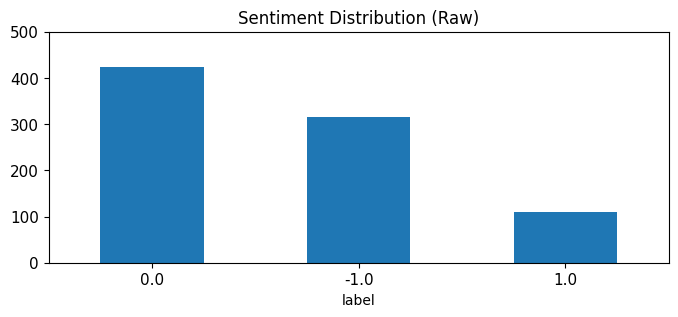

In [112]:
# Exercise 7
import math

maximum_count = df["label"].value_counts().max()
maximum_count_rounded = math.ceil(maximum_count / 100) * 100

# Plot bar chart for label distribution with raw labels (0,0, -1,0, 1.0)
df.label.value_counts().plot(
    kind="bar",
    title="Sentiment Distribution (Raw)",
    ylim=[0, maximum_count_rounded],
    rot=0, fontsize=11, figsize=(8,3),
)



<Axes: title={'center': 'Sentiment Distribution'}, xlabel='label_name'>

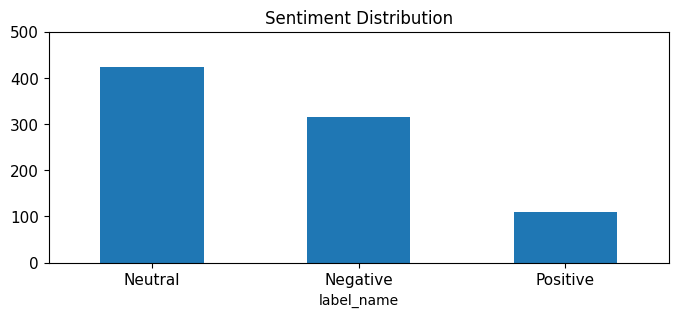

In [113]:
# Exercise 7
# Add a column that maps each label to its sentiment
label_dict = {-1.0: "Negative", 0.0: "Neutral", 1.0: "Positive"}
df["label_name"] = df["label"].map(label_dict)

# Plot bar chart for label distribution with label names
df.label_name.value_counts().plot(
    kind="bar",
    title="Sentiment Distribution",
    ylim=[0, maximum_count_rounded],
    rot=0, fontsize=11, figsize=(8,3),
)

<Axes: title={'center': 'Category distribution'}, xlabel='label_name'>

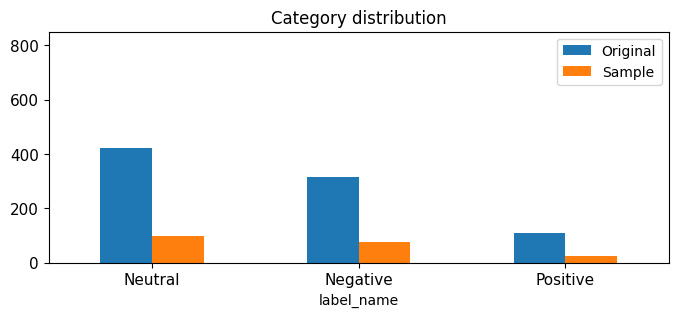

In [114]:
# Exercise 8
df_sample = df.sample(n=200) 
# Combine the two dataframes into one
combined = pd.DataFrame({
    'Original': df.label_name.value_counts(),
    'Sample': df_sample.label_name.value_counts() 
})

maximum_count = max(combined.max())
maximum_count_rounded = math.ceil(maximum_count / 100) * 100

combined.plot(kind='bar',
              title='Category distribution',
              ylim=[0, 850], # Set ylim as 850 so the legend doesn't cover any bars
              rot=0, fontsize=11, figsize=(8,3))

In [115]:
# Exercise 9
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)
analyze = count_vect.build_analyzer()
analyze(df["text"].iloc[0]) # We get the first text document and then call analyze

['calls', 'on', 'retards']

In [116]:
# Exercise 10
# There are no codes for each word so I'm skipping 10

<Axes: >

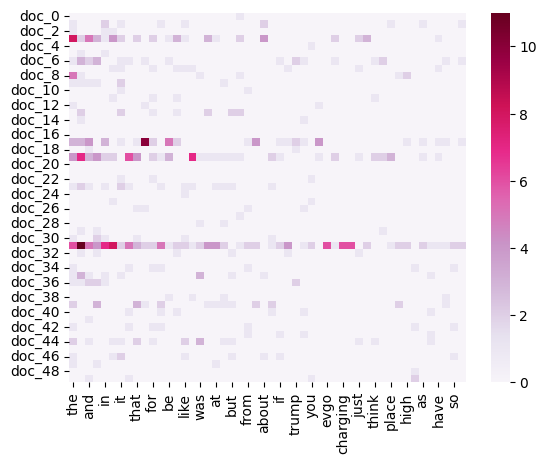

In [117]:
# First 50 reddit posts
documents = df_counts[0:50, :].toarray()

# Compute term frequencies
term_frequency = documents.sum(axis=0)

# Top 50 frequent terms
top_terms_index = term_frequency.argsort()[-50:][::-1]

plot_x = [count_vect.get_feature_names_out()[i] for i in top_terms_index]
plot_y = ["doc_"+ str(i) for i in range(documents.shape[0])]
plot_z = documents[:, top_terms_index]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=plot_z.max())


In [118]:
# Exercise 12
import plotly.express as pltly

# Calculate term frequencies the same way as part 1
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(df_counts[:, j].sum())

pltly.bar(
    x=count_vect.get_feature_names_out()[:300], 
    y=term_frequencies[:300],
    labels={'x':'Word', 'y':'Frequency'},
    title='Interactive Visualization of Word Frequency'
)


In [119]:
# Exercise 13
# I'll get the first 30 terms alphabetically.
n = 30 # Select first 30 terms for visualization
terms_freq = list(zip(count_vect.get_feature_names_out(), term_frequencies)) # Zip terms and frequencies together so they're treated as a group
terms_freq.sort(key=lambda x: x[0]) # Sort alphabetically
top_n_terms_freq = terms_freq[:n] # Only keep the first n terms
terms, frequencies = zip(*top_n_terms_freq) # Unzip the terms and frequencies so they're no longer grouped

pltly.bar(
    x=terms, 
    y=frequencies, 
    labels={'x':'Word', 'y':'Frequency'},
    title='Interactive Visualization of the First ' + str(n) + ' Words Alphabetically Sorted'
)

In [120]:
# Exercise 13 part 2
# I'll get the last 30 terms alphabetically.
n = 30 # Select last 30 terms for visualization
terms_freq = list(zip(count_vect.get_feature_names_out(), term_frequencies)) # Zip terms and frequencies together so they're treated as a group
terms_freq.sort(key=lambda x: x[0]) # Sort alphabetically
top_n_terms_freq = terms_freq[-n:]  # Only keep the last n terms
terms, frequencies = zip(*top_n_terms_freq) # Unzip the terms and frequencies so they're no longer grouped

pltly.bar(
    x=terms, 
    y=frequencies, 
    labels={'x':'Word', 'y':'Frequency'},
    title='Interactive Visualization of the Last ' + str(n) + ' Words Alphabetically Sorted'
)

In [121]:
# Exercise 14
n = 30 # Select top 30 terms for visualization
terms_freq = list(zip(count_vect.get_feature_names_out(), term_frequencies)) # Zip terms and frequencies together so they're treated as a group
terms_freq.sort(key=lambda x: x[1], reverse=True) # Sort by descending frequency
top_n_terms_freq = terms_freq[:n] # Only keep the top n terms
terms, frequencies = zip(*top_n_terms_freq) # Unzip the terms and frequencies so they're no longer grouped

pltly.bar(
    x=terms, 
    y=frequencies, 
    labels={'x':'Word', 'y':'Frequency'},
    title='Interactive Visualization of the Top ' + str(n) + ' Most Frequent Words in Descending Order'
)

In [122]:
# Exercise 15
n = 200 # Select top 30 terms for visualization
term_frequencies_log = [math.log(i) for i in term_frequencies]
terms_freq = list(zip(count_vect.get_feature_names_out(), term_frequencies_log)) # Zip terms and frequencies together so they're treated as a group
terms_freq.sort(key=lambda x: x[1], reverse=True) # Sort by descending frequency
top_n_terms_freq = terms_freq[:n] # Only keep the top n terms
terms, frequencies = zip(*top_n_terms_freq) # Unzip the terms and frequencies so they're no longer grouped

pltly.bar(
    x=terms, 
    y=frequencies, 
    labels={'x':'Term', 'y':'Frequency'},
    title='Interactive Visualization of the Top ' + str(n) + ' Most Frequent Terms in Descending Order (Log)'
)

# The difference between the first and second bar in the previous graph is a lot more obvious than this graph. This makes sense because the most 
# frequent term (the first bar) is less than double the frequency of the second term (the second bar), so when you take the base 2 log, the
# difference is minimal. With this observation, we can see that the long tail is a lot less obvious in this graph, since all of the bars
# are very similar in height, so it's less skewed. On the other hand, the tail in the previous graph was very obvious and a big feature of the 
# graph. Also, compared to the previous graph, the scale of the y-axis for this graph is a lot smaller (30k VS 10).


# Part 3: Meaningful new data visualizations

In [123]:

# Graph of most used word per year

# Turn datetime into a time data type
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
# Parse out the year and add it as its own column
df['year'] = df['datetime'].dt.year
most_common_words = []
count_vect = CountVectorizer()

for year, group in df.groupby('year'):
    # Get all the texts per year and the frequency count for each word
    X = count_vect.fit_transform(group['text'])
    counts = pd.DataFrame(X.toarray(), columns=count_vect.get_feature_names_out())
    term_frequencies = counts.sum(axis=0).sort_values(ascending=False)

    # Get most common word and its frequency count
    most_common_word = term_frequencies.index[0]
    most_common_count = term_frequencies.iloc[0]

    most_common_words.append((year, most_common_word, most_common_count))

trend_df = pd.DataFrame(most_common_words, columns=['year', 'word', 'count'])

visualization = pltly.bar(
    trend_df,
    x='year',
    y='count',
    text='word',
    labels={'year': 'Year', 'count': 'Frequency'},
    title='Most Common Word per Year'
)

# Move the word above the bar
visualization.update_traces(textposition='outside')
visualization


In [124]:
# Graph of the relationship between subjectivity and polarity

pltly.scatter( # scatter plot
    df,
    x='subjectivity',
    y='polarity',
    color='polarity',
    color_continuous_scale='sunset', # Found color from https://plotly.com/python/builtin-colorscales/
    opacity=1,
    labels={'subjectivity': 'Subjectivity', 'polarity': 'Polarity'},
    title='Relationship Between Polarity and Subjectivity'
)

# From the graph, we can see that less subjective topics have less polarity.
# As the subjectivity increases, the opinions start to diverge so the polarity
# starts to increase.

In [125]:

# Graph of the popularity of subreddits over the years

mp = dict() # {subreddit: (year, number_of_posts)}

# Create the mp map 
for year, group in df.groupby('year'):
    counts = group['subreddit'].value_counts()
    for subreddit_name, post_count in counts.items():
        if subreddit_name not in mp: mp[subreddit_name] = [[year, post_count]]
        else: mp[subreddit_name].append([year, post_count])

line_df = pd.DataFrame([
    {'year': year, 'count': count, 'subreddit': subreddit}
    for subreddit, values in mp.items()
    for year, count in values
])

pltly.line(
    line_df,
    x='year',
    y='count',
    color='subreddit',
    markers=True,
    labels={'year': 'Year', 'count': 'Number of Posts'},
    title='Popularity of Subreddits Over the Years'
)

# From the graph, we can see that we only have posts from the subreddits 
# "StockMarket" and "wallstreetbets" from the year 2025. We can also see that the
# subreddit "stocks" grows in popularity every year, while "stockstobuytoday" 
# dipped in popularity and is now at the same popularity as it was 4 years ago.


# Phase 2

In [126]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each subreddit
subreddits = df['subreddit'].unique()  # Get unique subreddit labels
subreddit_dfs = {}  # Dictionary to store DataFrames for each subreddit

for subreddit in subreddits:
    # Filter the original DataFrame by subreddit
    subreddit_dfs[subreddit] = df[df['subreddit'] == subreddit].copy()

# Function to create term-document frequency DataFrame for each subreddit
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each subreddit
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for subreddit in subreddits:
    filt_term_document_dfs[subreddit] = create_term_document_df(subreddit_dfs[subreddit])

In [127]:
# Display the filtered DataFrame for one of the subreddits.
subreddit_number=3 
print(f"Filtered Term-Document Frequency DataFrame for Category {subreddits[category_number]}:")
filt_term_document_dfs[subreddits[subreddit_number]]

Filtered Term-Document Frequency DataFrame for Category wallstreetbets:


,00,000,02,03,06,10,100,10000,10ks,10yr,...,you,young,your,yours,yourself,yoyo,yup,zero,zgld,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


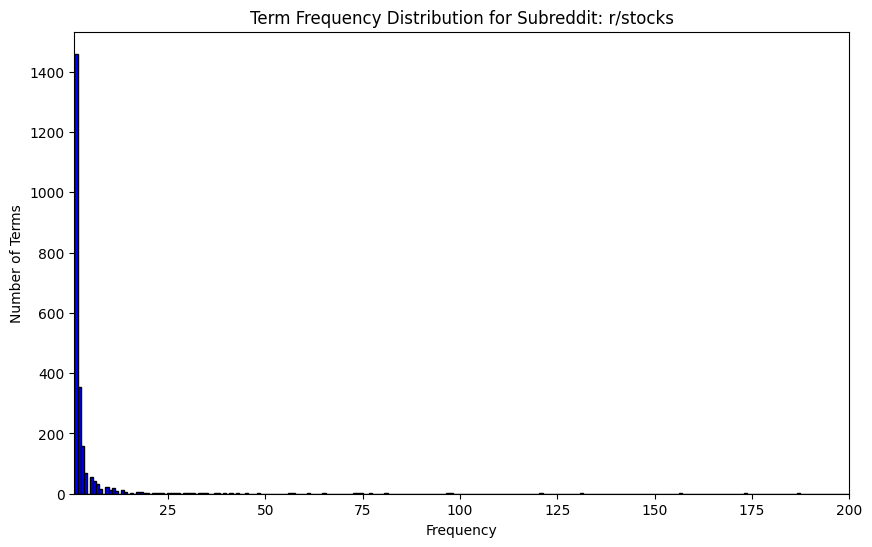

In [128]:
 # Sum over all documents to get total frequency for each word
word_counts = filt_term_document_dfs[subreddits[subreddit_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=500, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Subreddit: r/{subreddits[subreddit_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [129]:
word_counts = filt_term_document_dfs[subreddits[subreddit_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[subreddits[subreddit_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {subreddits[subreddit_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: stocks
Number of terms in top 5%: 117
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'you', 'that', 'on', 'this', 'for', 'will', 'are', 'be', 'if', 'as', 'us', 'with', 'but', 'he', 'all', 'trump', 'at', 'not', 'have', 'they', 'what', 'or', 'was', 'so', 'we', 'people', 'like', 'market', 'has', 'my', 'from', 'there', 'more', 'now', 'your', 'no', 'think', 'china', 'by', 'silver', 'just', 'their', 'can', 'how', 'even', 'do', 'money', 'than', 're', 'an', 'other', 'why', 'one', 'about', 'would', 'going', 'tariffs', 'them', 'some', 'any', 'our', 'most', 'don', 'who', 'when', 'economy', 'see', 'down', 'his', 'then', 'me', 'because', 'world', 'been', 'up', 'want', 'back', 'time', 'term', 'companies', 'already', 'good', 'doing', 'last', 'really', 'portfolio', 'sell', 'only', 'much', 'which', '10', 'years', 'over', 'could', 'out', 'too', 'day', 'trade', 'every', 'into', 'wants', 'go', 'buy', 'does', 'here', 'him', 'point', 'company', 'get', 'bad']


In [130]:
filt_term_document_dfs[subreddits[subreddit_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

np.int64(399)

In [131]:
word_counts = filt_term_document_dfs[subreddits[subreddit_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[subreddits[subreddit_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {subreddits[subreddit_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: stocks
Number of terms in bottom 1%: 23
Filtered terms: ['leaning', 'newsletter', 'newb', 'net', 'neither', 'negotiations', 'negotiating', 'negatively', 'neck', 'necessities', 'necessary', 'nearly', 'near', 'navarro', 'nauseam', 'nations', 'nationalist', 'national', 'name', 'nah', 'mutual', 'muscles', 'murica']


In [132]:
filt_term_document_dfs[subreddits[subreddit_number]].loc[:,'murica'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

np.int64(1)

In [133]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each subreddit
term_document_dfs = {}

for subreddit in subreddits:
    print(f'\nFor subreddit {subreddit} we filter the following words:')
    term_document_dfs[subreddit] = filter_top_bottom_words_by_sum(filt_term_document_dfs[subreddit])

# Example: Display the filtered DataFrame for one of the subreddits
print(f"Filtered Term-Document Frequency DataFrame for Subreddit {subreddits[subreddit_number]}:")
term_document_dfs[subreddits[subreddit_number]]



For subreddit wallstreetbets we filter the following words:
Bottom 1.0% words: 
zero             1
intern           1
international    1
store            1
investing        1
investment       1
ip               1
ipo              1
iq               1
dtype: int64
Top 5.0% words: 
she          8
market       8
with         8
still        8
when         8
go           8
if           8
what         9
up           9
good         9
puts         9
about        9
there        9
no           9
target      10
we          10
be          10
will        10
now         10
not         10
over        11
all         11
was         11
have        12
are         12
at          14
but         15
just        15
can         15
like        16
so          17
emote       18
img         18
t5_2th52    18
on          20
my          21
that        21
of          23
this        24
they        25
for         26
you         28
is          29
in          29
and         37
it          43
the         57
to          6

,00,000,02,03,06,100,10000,10ks,10yr,11,...,yippee,yo,young,yours,yourself,yoyo,yup,zero,zgld,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
# Exercise 16 
# Some of the words filtered out in the bottom 1% are surprising since they seem to be common words when discussing stocks. For 
# example, "investment", "investing", "international", "ipo" are common finance terms. The words in the top 5% are a mixture of
# common English words and finance terms. The common English words are words that appear frequently, not specifically finance terms,
# such as "the", "to", and "with". So both categories have finance terms, but the top 5% also has a lot of common English words.

In [135]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for subreddit in term_document_dfs:
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[subreddit])           
        
    obj.convert2TransactionalDatabase(f'td_{subreddit}.csv', '>=', 1)


Database size (total no of transactions) : 274
Number of items : 2206
Minimum Transaction Size : 1
Average Transaction Size : 14.284671532846716
Maximum Transaction Size : 165
Standard Deviation Transaction Size : 17.008134123176575
Variance in Transaction Sizes : 290.3362476939119
Sparsity : 0.993524627591638


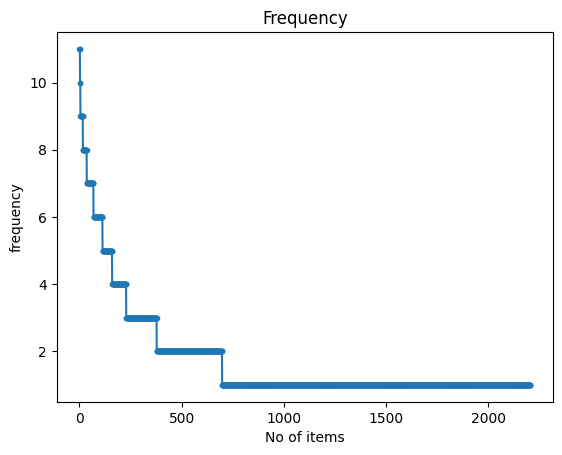

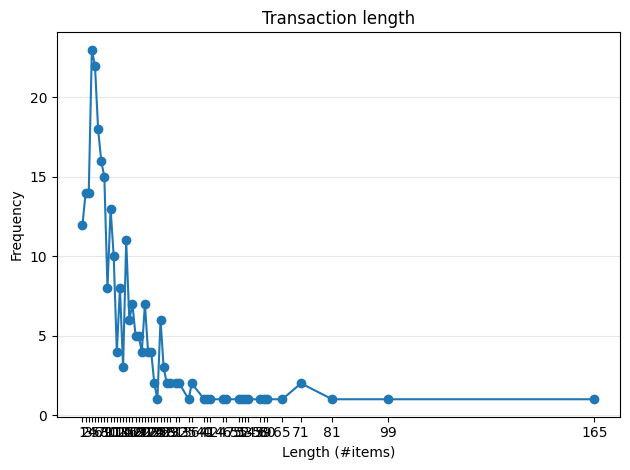

In [136]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_stocks.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 274
Number of items : 2206
Minimum Transaction Size : 1
Average Transaction Size : 14.284671532846716
Maximum Transaction Size : 165
Standard Deviation Transaction Size : 17.008134123176575
Variance in Transaction Sizes : 290.3362476939119
Sparsity : 0.993524627591638


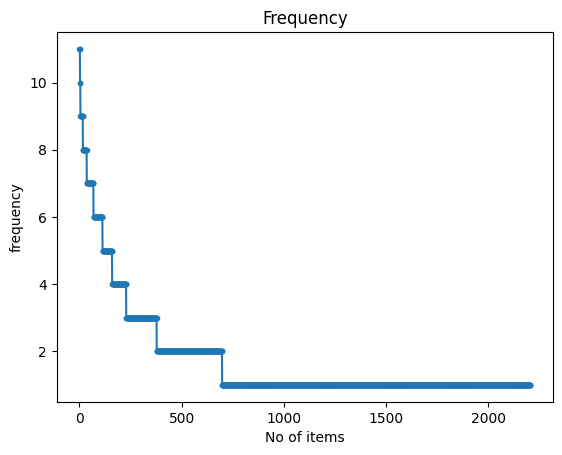

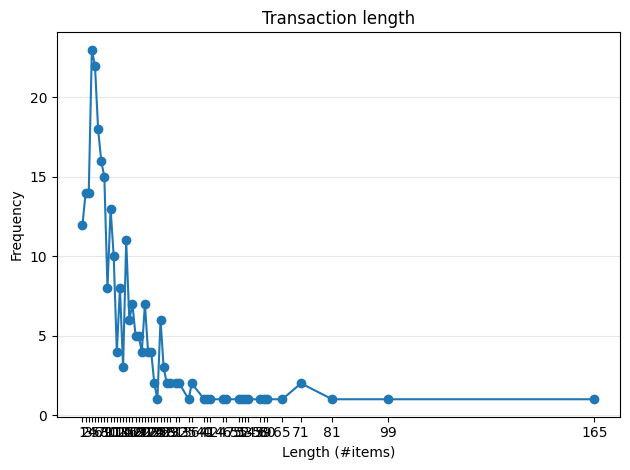

In [137]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_stocks.csv')
obj.run()
obj.printStats()
obj.plotGraphs()


Database size (total no of transactions) : 274
Number of items : 2206
Minimum Transaction Size : 1
Average Transaction Size : 14.284671532846716
Maximum Transaction Size : 165
Standard Deviation Transaction Size : 17.008134123176575
Variance in Transaction Sizes : 290.3362476939119
Sparsity : 0.993524627591638


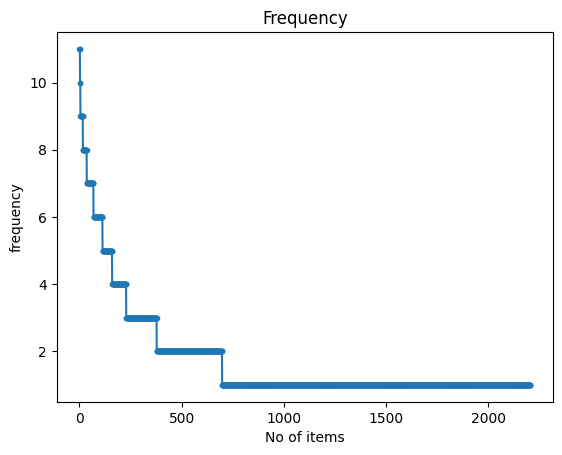

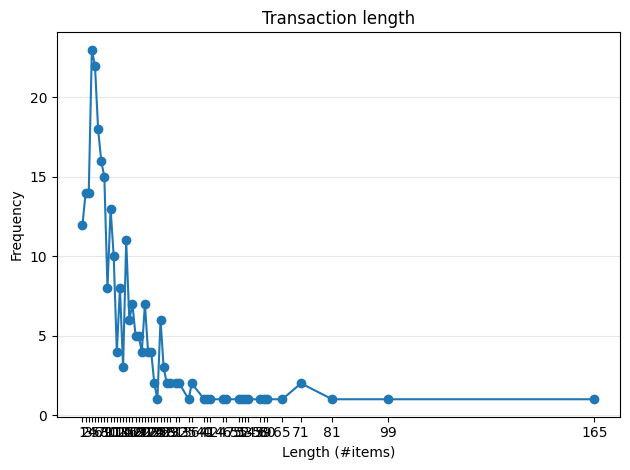

In [138]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_stocks.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 274
Number of items : 2206
Minimum Transaction Size : 1
Average Transaction Size : 14.284671532846716
Maximum Transaction Size : 165
Standard Deviation Transaction Size : 17.008134123176575
Variance in Transaction Sizes : 290.3362476939119
Sparsity : 0.993524627591638


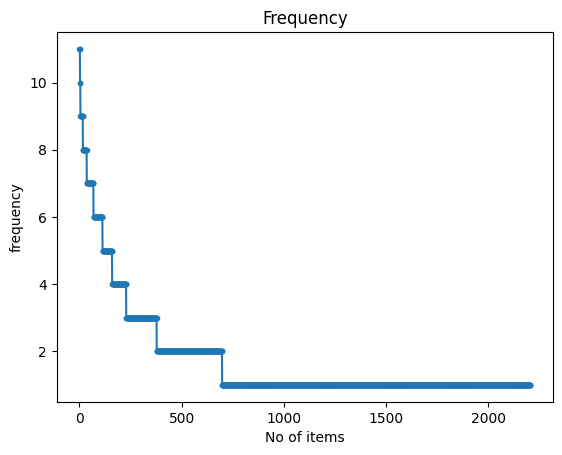

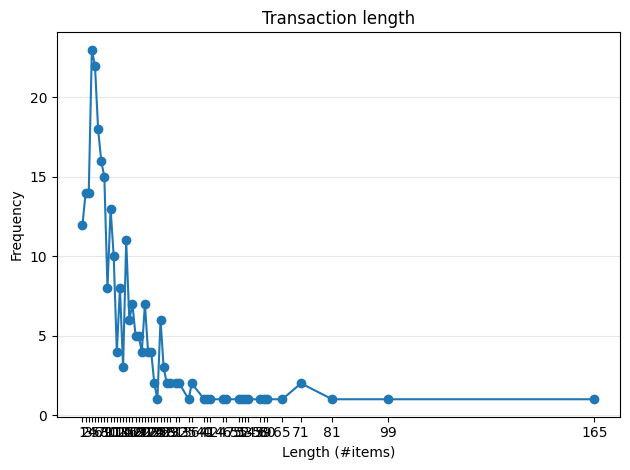

In [139]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_stocks.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [140]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_stocks.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_stocks= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stocks))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 17
Runtime: 0.0016758441925048828


In [141]:
obj1.save('freq_patterns_stocks.txt') #save the patterns
frequentPatternsDF_stocks

,Patterns,Support
0,looking,9
1,ve,9
2,right,9
3,buying,9
4,seems,9
5,still,9
6,country,9
7,reason,9
8,make,9
9,way,9


In [142]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_StockMarket.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_stock_market= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stock_market))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 5
Runtime: 0.001383066177368164


In [143]:
obj3.save('freq_patterns_StockMarket.txt') #save the patterns
frequentPatternsDF_stock_market

,Patterns,Support
0,from,9
1,want,9
2,than,9
3,get,10
4,there,10


In [144]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_wallstreetbets.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_wall_street_bets = obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_wall_street_bets))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 0
Runtime: 0.0008330345153808594


In [145]:
obj3.save('freq_patterns_wallstreetbets.txt') #save the patterns
frequentPatternsDF_wall_street_bets

,Patterns,Support


In [146]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_stockstobuytoday.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_stocks_to_buy_today = obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stocks_to_buy_today))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 0
Runtime: 0.0011510848999023438


In [147]:
obj3.save('freq_patterns_stockstobuytoday.txt') #save the patterns
frequentPatternsDF_stocks_to_buy_today

,Patterns,Support


In [148]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_stocks, frequentPatternsDF_stock_market, frequentPatternsDF_wall_street_bets, frequentPatternsDF_stocks_to_buy_today]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

   Patterns Support
16    since      11
15     also      11
14   things      11
21    there      10
20      get      10
13     know      10
12     shit      10
1        ve       9
19     than       9
18     want       9
17     from       9
0   looking       9
10   better       9
9       way       9
8      make       9
7    reason       9
6   country       9
5     still       9
4     seems       9
3    buying       9
2     right       9
11   reddit       9
Number of patterns discarded: 0


In [160]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,better,way,make,reason,country,still,seems,buying,right,reddit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
# Exercise 17
from PAMI.frequentPattern.topk import FAE  as alg
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg2

k= [5, 10, 15]
threshold = [3, 6, 9]

def fae_top_k(k_values):
    for k in k_values:
        obj = alg.FAE(iFile='td_stocks.csv', k=k, sep='\t')
        obj.mine() 
        frequentPatternsDF= obj.getPatternsAsDataFrame()
        print('Total No of patterns: ' + str(len(frequentPatternsDF)))
        print('Runtime: ' + str(obj.getRuntime()))
        print("\n")

# Function to run MaxFPGrowth algorithm
def max_fpgrowth(thresholds):
    for cur_threshold in thresholds:
        print("Min Support = " + str(cur_threshold))
        obj = alg2.MaxFPGrowth(iFile='td_stocks.csv', minSup=cur_threshold, sep='\t')
        obj.mine()
        frequentPatternsDF= obj.getPatternsAsDataFrame()
        print('Total No of patterns: ' + str(len(frequentPatternsDF)))
        print('Runtime: ' + str(obj.getRuntime()))
        print("\n")
        
fae_top_k(k)
max_fpgrowth(threshold)



 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 5
Runtime: 0.007899761199951172


 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 10
Runtime: 0.003798961639404297


 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 15
Runtime: 0.003573894500732422


Min Support = 3
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 363
Runtime: 0.007984161376953125


Min Support = 6
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 113
Runtime: 0.003246784210205078


Min Support = 9
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 17
Runtime: 0.00152587890625




In [164]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [165]:
X_pca_tdm.shape

(847, 2)

In [166]:
X_tsne_tdm.shape

(847, 2)

In [167]:
X_umap_tdm.shape

(847, 2)

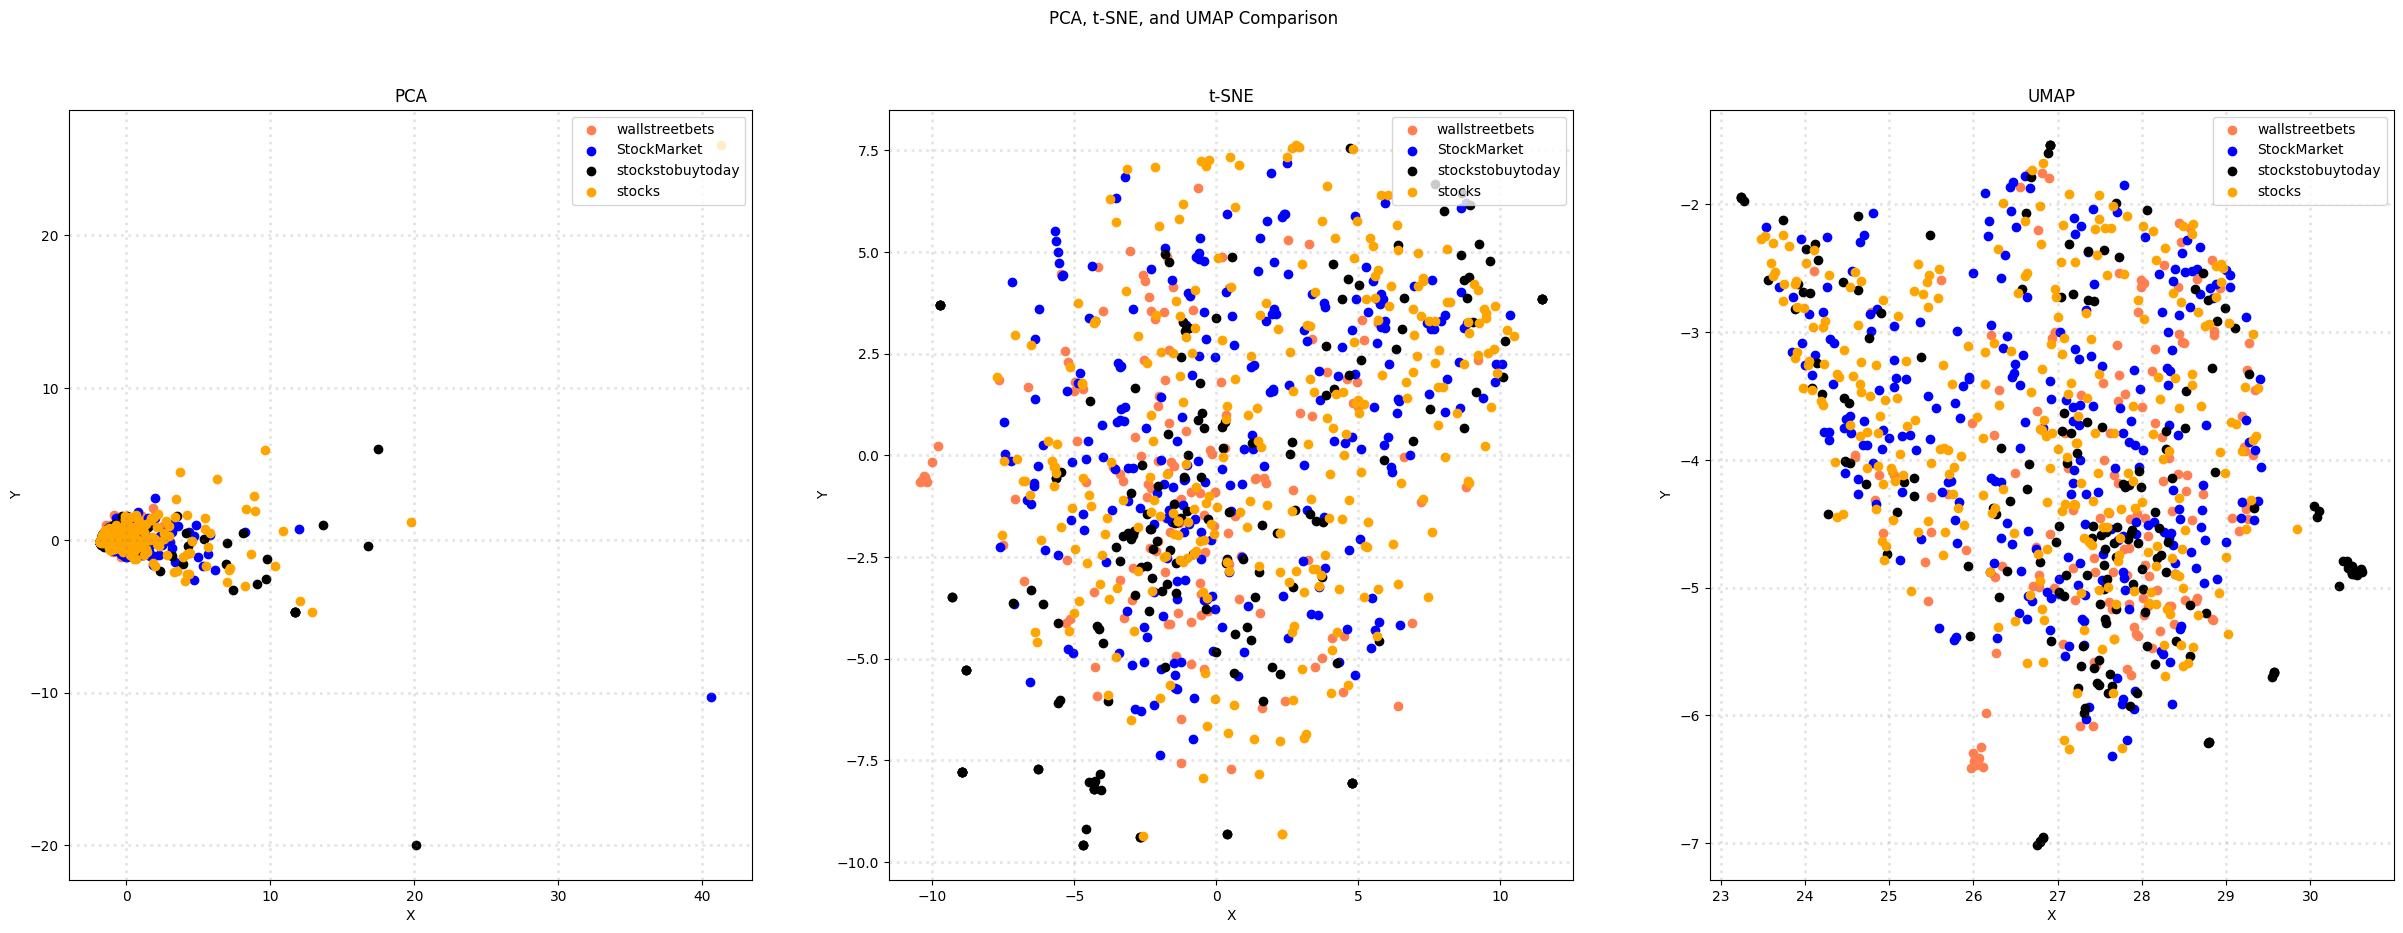

In [168]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
subreddits = df['subreddit'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, subreddit in zip(col, subreddits):
        xs = X_reduced[df['subreddit'] == subreddit].T[0]
        ys = X_reduced[df['subreddit'] == subreddit].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=subreddit)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [169]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

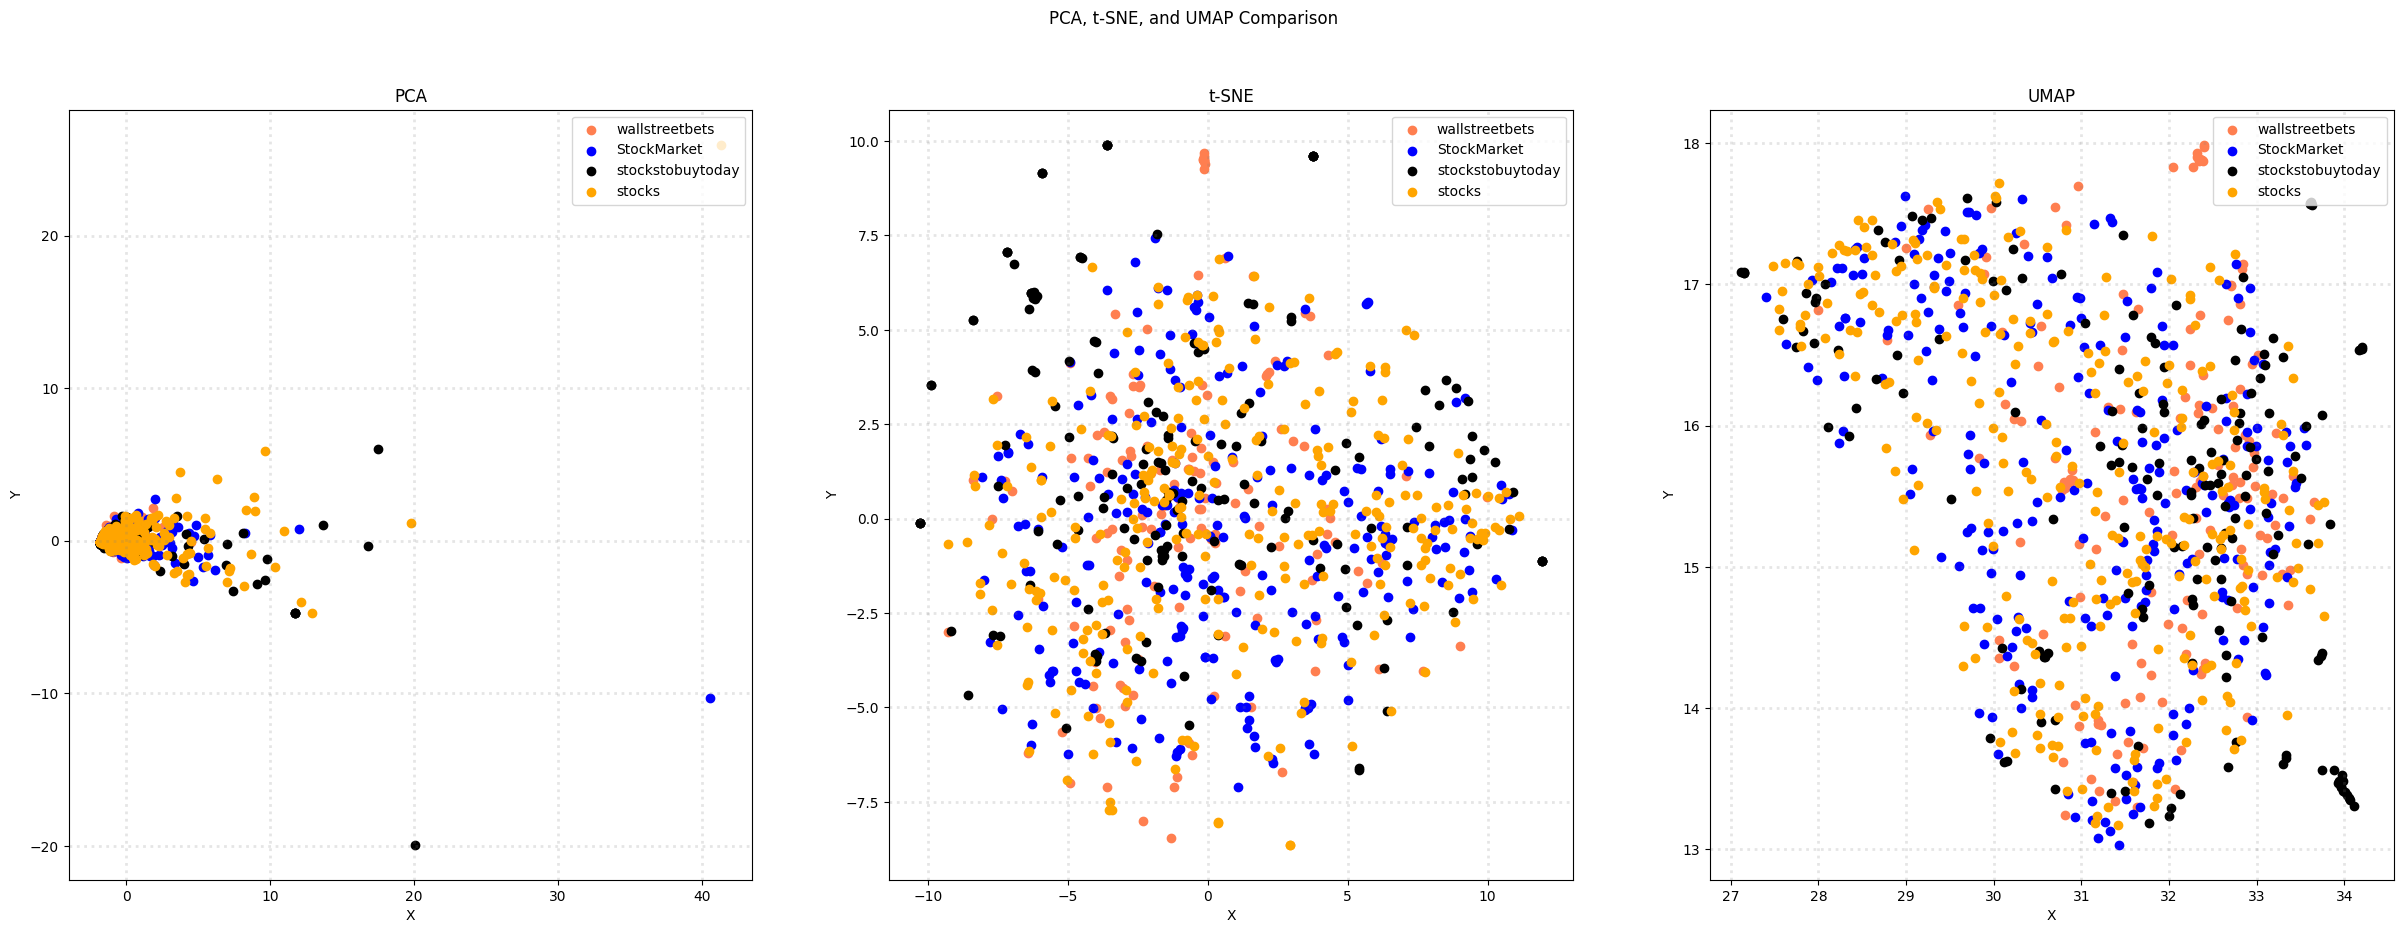

In [170]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['subreddit'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, subreddit in zip(col, subreddits):
        xs = X_reduced[df['subreddit'] == subreddit].T[0]
        ys = X_reduced[df['subreddit'] == subreddit].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=subreddit)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

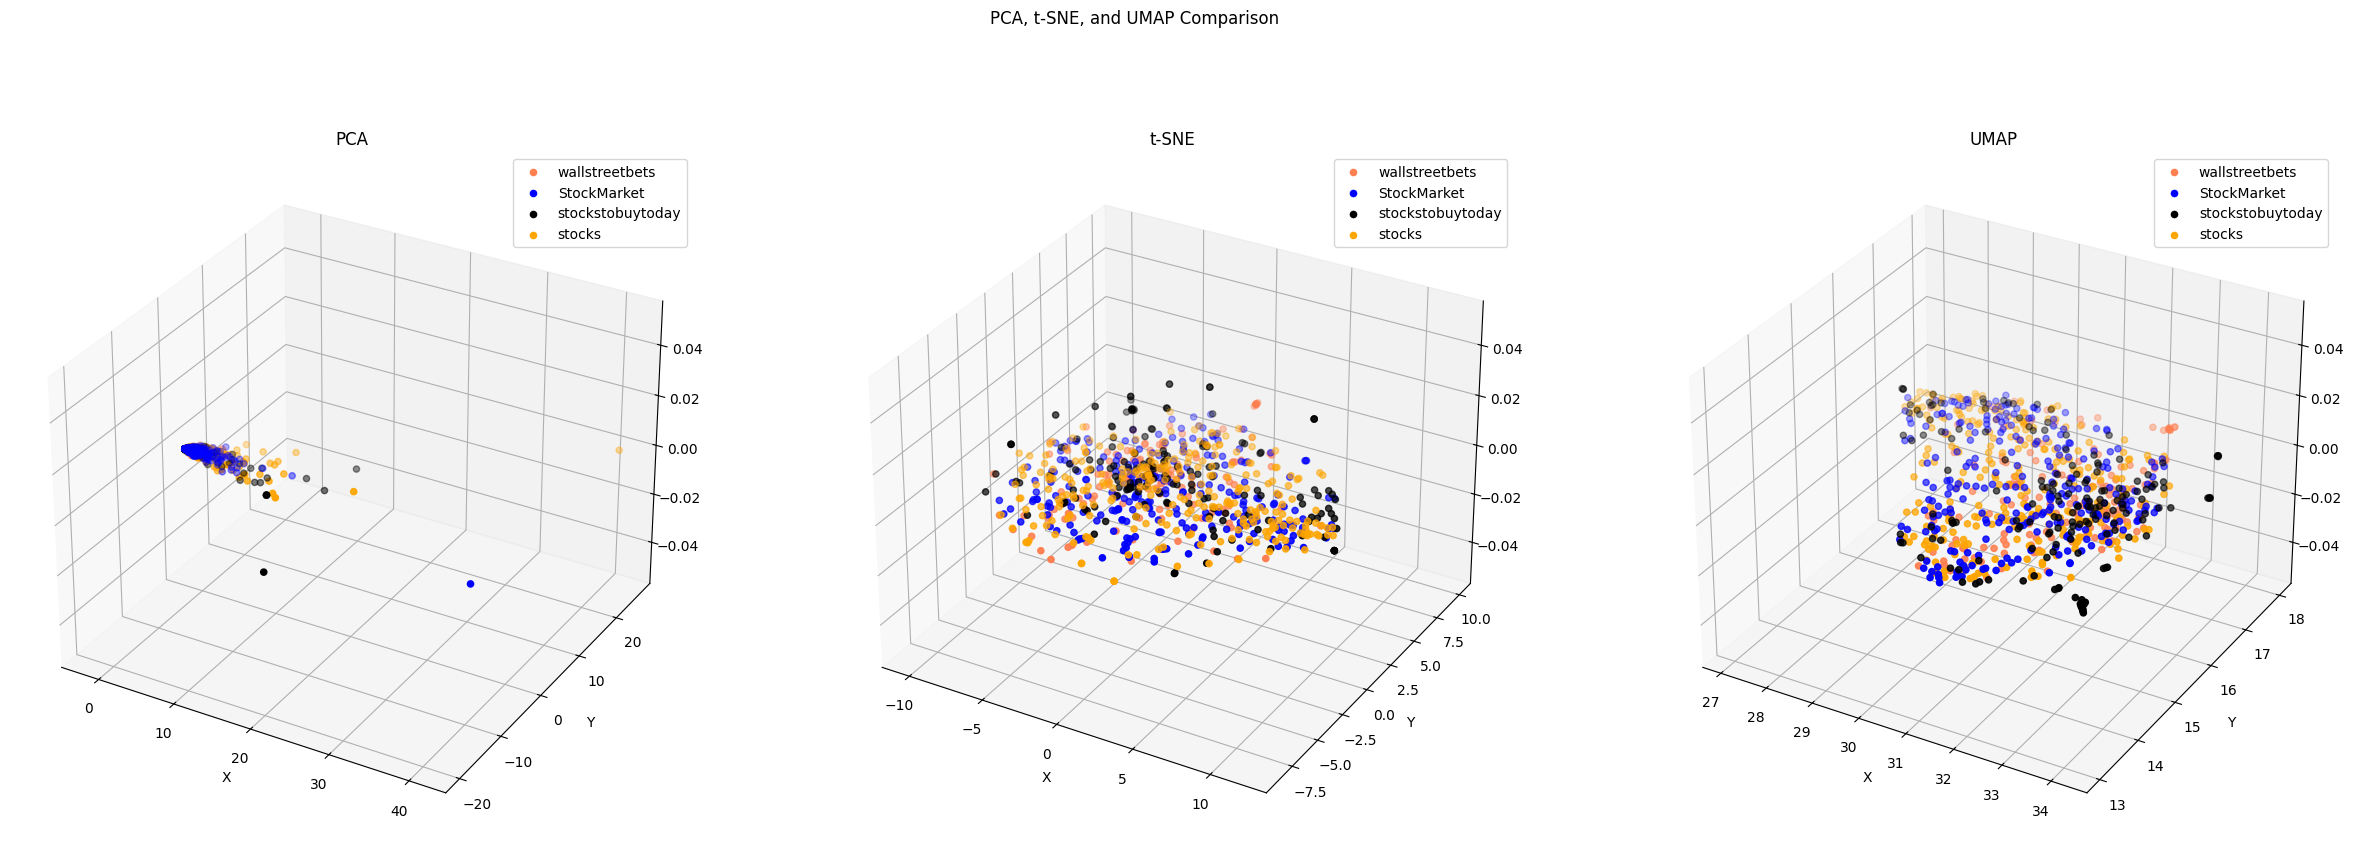

In [ ]:
# Exercise 18
from mpl_toolkits.mplot3d import Axes3D
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['subreddit'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, subreddit in zip(col, subreddits):
        xs = X_reduced[df['subreddit'] == subreddit].T[0]
        ys = X_reduced[df['subreddit'] == subreddit].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=subreddit)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [171]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.subreddit)
df['bin_subreddit'] = mlb.transform(df['subreddit']).tolist()
df[0:9]

,text,label,subjectivity,polarity,datetime,subreddit,tokenized_text,bin_subreddit
0,Calls on retards,-1.0,1.000000,-0.900000,2025-04-11 17:29:56,wallstreetbets,"{retards, Calls, on}","[0, 0, 0, 1]"
1,Stunt as in like why did they even make a big ...,0.0,0.177778,0.083333,2025-04-12 1:12:19,wallstreetbets,"{ever, in, a, as, deal, No, starting, first, p...","[0, 0, 0, 1]"
2,Seeing lots of red in the ticker.,0.0,0.000000,0.000000,2025-04-10 15:09:41,StockMarket,"{red, Seeing, ticker., in, the, of, lots}","[1, 0, 0, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,0.646970,0.216383,2023-08-30 17:12:55,stockstobuytoday,"{creating, Inc., Points**, be, collaboration, ...","[0, 0, 1, 0]"
4,He didn’t say thank you.,-1.0,0.000000,0.000000,2025-04-11 14:48:05,StockMarket,"{thank, say, He, didn’t, you.}","[1, 0, 0, 0]"
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,0.500000,0.250000,2025-04-12 2:19:03,wallstreetbets,"{wet, to, tonight,, in, luck, puss, Hoping, me...","[0, 0, 0, 1]"
6,Trump will respond to china increasing their t...,-1.0,0.380000,-0.108333,2025-04-11 12:37:23,stocks,"{be, LOT, to, are, increasing, adjust, is, rep...","[0, 1, 0, 0]"
7,Confirmed not a trap. Its been like this for p...,0.0,0.700000,0.050000,2025-04-11 17:28:50,wallstreetbets,"{a, just, not, slowly, probably, have, let, be...","[0, 0, 0, 1]"
8,Am I the only one seeing the cup & handle brea...,1.0,0.491818,0.057045,2021-02-01 15:36:32,stocks,"{folks., to, a, The, Third, week, 52, high., p...","[0, 1, 0, 0]"


In [ ]:
# Exercise 19: don't need to redo

In [174]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[1]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[66]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[109]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [175]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.']
['The funny part is that Elmo has called Navarro Trump’s tariff “expert” who is such an expert he made up an economist to sell the idea that is just his name rearranged (Ron Vara)  a dumbass and does not want many of these tariffs. At least not the ones that will hurt him. \n\nBut the rest of the corrupt fascist agenda keeps him coming back for more I guess.']
['FELON']


In [176]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [177]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.084661
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/lq/q7slrmmj66n1lcz356h8bwjr0000gn/T/ipykernel_9535/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/lq/q7slrmmj66n1lcz356h8bwjr0000gn/T/ipykernel_9535/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/lq/q7slrmmj66n1lcz356h8bwjr0000gn/T/ipykernel_9535/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/lq/q7slrmmj66n1lcz356h8bwjr0000gn/T/ipykernel_9535/452772485.py:17: Depreca

In [ ]:
# Exercise 20
#Answer
# We retrieve 3 sentences for a random record (index 54, 55, 56)
document_to_transform_4 = []
random_record_4 = df.iloc[54]
random_record_4 = random_record_4['text']
document_to_transform_4.append(random_record_4)

document_to_transform_5 = []
random_record_5 = df.iloc[55]
random_record_5 = random_record_5['text']
document_to_transform_5.append(random_record_5)

document_to_transform_6 = []
random_record_6 = df.iloc[56]
random_record_6 = random_record_6['text']
document_to_transform_6.append(random_record_6)

print(document_to_transform_4)
print(document_to_transform_5)
print(document_to_transform_6)

# Transform sentence with Vectorizers
document_vector_count_4 = count_vect.transform(document_to_transform_4)
document_vector_count_5 = count_vect.transform(document_to_transform_5)
document_vector_count_6 = count_vect.transform(document_to_transform_6)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_4_bin = binarize(document_vector_count_4)
document_vector_count_5_bin = binarize(document_vector_count_5)
document_vector_count_6_bin = binarize(document_vector_count_6)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_4.todense())
print(document_vector_count_5.todense())
print(document_vector_count_6.todense())

# Calculate Cosine Similarity
cos_sim_count_4_5 = cosine_similarity(document_vector_count_4, document_vector_count_5, dense_output=True)
cos_sim_count_4_6 = cosine_similarity(document_vector_count_4, document_vector_count_6, dense_output=True)
cos_sim_count_5_6 = cosine_similarity(document_vector_count_5, document_vector_count_6, dense_output=True)

cos_sim_count_4_4 = cosine_similarity(document_vector_count_4, document_vector_count_4, dense_output=True)
cos_sim_count_5_5 = cosine_similarity(document_vector_count_5, document_vector_count_5, dense_output=True)
cos_sim_count_6_6 = cosine_similarity(document_vector_count_6, document_vector_count_6, dense_output=True)

# Print 
print("Cosine Similarity using count bw 4 and 5: %(x)f" %{"x":cos_sim_count_4_5})
print("Cosine Similarity using count bw 4 and 6: %(x)f" %{"x":cos_sim_count_4_6})
print("Cosine Similarity using count bw 5 and 6: %(x)f" %{"x":cos_sim_count_5_6})

print("Cosine Similarity using count bw 4 and 4: %(x)f" %{"x":cos_sim_count_4_4})
print("Cosine Similarity using count bw 5 and 5: %(x)f" %{"x":cos_sim_count_5_5})
print("Cosine Similarity using count bw 6 and 6: %(x)f" %{"x":cos_sim_count_6_6})


# The results of cosine similarity can be as follows:
# The closer the result is to 1, the more similar the two documents are. This is why when a subreddit is compared to itself, the cosine similarity
# score is 1. On the other hand, the closer the result is to 0, the more different the two compared subreddits are because they have different 
# words and content in the document. 

['You know what, as an American. I hope china comes out on top to teach him a lesson. Idgaf anymore']
['The steal']
['To be fair, Chinese exports to the US make up a much larger portion of China’s GDP than the other way around. China kinda does rely on the US consumer to a degree.']
Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
Cosine Similarity using count bw 4 and 5: 0.000000
Cosine Similarity using count bw 4 and 6: 0.206284
Cosine Similarity using count bw 5 and 6: 0.309426
Cosine Similarity using count bw 4 and 4: 1.000000
Cosine Similarity using count bw 5 and 5: 1.000000
Cosine Similarity using count bw 6 and 6: 1.000000


/var/folders/lq/q7slrmmj66n1lcz356h8bwjr0000gn/T/ipykernel_9535/1653895504.py:49: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/lq/q7slrmmj66n1lcz356h8bwjr0000gn/T/ipykernel_9535/1653895504.py:50: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/lq/q7slrmmj66n1lcz356h8bwjr0000gn/T/ipykernel_9535/1653895504.py:51: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/lq/q7slrmmj66n1lcz356h8bwjr0000gn/T/ipykernel_9535/1653895504.py:53: Dep

In [213]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


target_names = df['subreddit'].unique()
print(target_names)
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['subreddit'], test_size=0.3, random_state=42)

['wallstreetbets' 'StockMarket' 'stockstobuytoday' 'stocks']


In [214]:
X_train

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
X_test

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5529411764705883

Classification Report:
                   precision    recall  f1-score   support

  wallstreetbets     0.5570    0.6111    0.5828        72
     StockMarket     0.4885    0.7356    0.5872        87
stockstobuytoday     0.7826    0.3673    0.5000        49
          stocks     0.6818    0.3191    0.4348        47

        accuracy                         0.5529       255
       macro avg     0.6275    0.5083    0.5262       255
    weighted avg     0.6000    0.5529    0.5411       255



In [ ]:
# Exercise 21
# Split the data into training and testing sets (70% train, 30% test)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, df['subreddit'], test_size=0.3, random_state=42)
X_train_aug

,00,000,01378,02,027,03,06,08,10,100,...,better,way,make,reason,country,still,seems,buying,right,reddit
739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
X_test_aug

,00,000,01378,02,027,03,06,08,10,100,...,better,way,make,reason,country,still,seems,buying,right,reddit
457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
351,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [219]:
# Train the Naive Bayes classifier
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

# Make predictions on the test set
y_pred_aug = nb_classifier_aug.predict(X_test_aug)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

Accuracy: 0.5450980392156862

Classification Report:
                   precision    recall  f1-score   support

  wallstreetbets     0.5301    0.6111    0.5677        72
     StockMarket     0.4921    0.7126    0.5822        87
stockstobuytoday     0.7500    0.3673    0.4932        49
          stocks     0.6818    0.3191    0.4348        47

        accuracy                         0.5451       255
       macro avg     0.6135    0.5026    0.5195       255
    weighted avg     0.5873    0.5451    0.5338       255



In [ ]:

# Exercise 22
# The original TDM has accuracy 0.5529411764705883 while the augmented TDM has accuracy 0.5450980392156862. So the 
# augmented TDM has lower accuracy. A lot of the numbers for precision, recall, and f1-score are the same across the two. StockMarket 
# subreddit's precision score increases in the augmented TDM. However, the accuracy, macro avg, and weighted avg of the augmented TDM are lower
# than the original TDM.

In [220]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['subreddit'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.4392156862745098

Classification Report:
                   precision    recall  f1-score   support

  wallstreetbets     0.4156    0.4444    0.4295        72
     StockMarket     0.4930    0.4023    0.4430        87
stockstobuytoday     0.5581    0.4898    0.5217        49
          stocks     0.3281    0.4468    0.3784        47

        accuracy                         0.4392       255
       macro avg     0.4487    0.4458    0.4432       255
    weighted avg     0.4533    0.4392    0.4424       255



In [221]:
tdm_df

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Exercise 23
# I think the performance of Decision Trees is lower than Naive Bayes because it's possible that the tree is 
# overfitting the training data due to the high dimensionality and sparsity of the TDM. I think that the independence
# assumption of Naive Bayes prevents this from happening as much.

In [ ]:
# Exercise 24
# Given the results below, the performance is better than the original TDM model. The augmented TDM has an accuracy of 
# 0.4196078431372549 whereas the original TDM has an accuracy of 0.4392156862745098. The decrease in performance is very small
# and still performs worse than the Naive Bayes model. I think it's still overfitting and there can be a lot of overlap between the subreddits 
# texts as they all discuss finance and stocks, so it is very hard to train and very easy for the model to misclassify. I think that the 
# independence assumption of Naive Bayes helps prevent overfitting.

In [222]:
#Answer
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['subreddit'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.4196078431372549

Classification Report:
                   precision    recall  f1-score   support

  wallstreetbets     0.3765    0.4444    0.4076        72
     StockMarket     0.5000    0.4023    0.4459        87
stockstobuytoday     0.5789    0.4490    0.5057        49
          stocks     0.2903    0.3830    0.3303        47

        accuracy                         0.4196       255
       macro avg     0.4364    0.4197    0.4224       255
    weighted avg     0.4416    0.4196    0.4253       255



##### Exercise 25
There's a lot of trial and error with model choosing. One should test multiple options before deciding the best one. First, we should pick the right evaluation metrics for the problem. For example, in classification you might care about accuracy. However, if there's an imbalance in classes, we may have to use precision, recall, or F1-score as the evaluation metric instead. We can use cross-validation to check if a model actually generalizes and is not just memorizing the training data (which leads to overfitting).

We should also consider the complexity of the models. Basic ones take less time to train and make predictions. Complex ones may generate better results.

Different data should have different models too. For example, linear regression is bad for classification problems. In this case, I think Naive Bayes or Bayes is a solid choice.


In [234]:
# Question 3
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, classification_report

X = df["text"]
y = df["subreddit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Count features
count_vec = CountVectorizer()
X_train_counts = count_vec.fit_transform(X_train)
X_test_counts = count_vec.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_counts, y_train)
print("Count NB accuracy:", accuracy_score(y_test, nb_classifier.predict(X_test_counts)))

# TF-IDF features
tfidf_vec = TfidfVectorizer()
X_train_tfidf = tfidf_vec.fit_transform(X_train)
X_test_tfidf = tfidf_vec.transform(X_test)

nb_tfidf = ComplementNB()
nb_tfidf.fit(X_train_tfidf, y_train)

print("TF-IDF NB accuracy:", accuracy_score(y_test, nb_tfidf.predict(X_test_tfidf)))
print(classification_report(y_test, nb_tfidf.predict(X_test_tfidf)))

Count NB accuracy: 0.5254901960784314
TF-IDF NB accuracy: 0.5411764705882353
                  precision    recall  f1-score   support

     StockMarket       0.47      0.53      0.50        75
          stocks       0.48      0.72      0.58        83
stockstobuytoday       0.89      0.63      0.74        52
  wallstreetbets       0.56      0.11      0.19        45

        accuracy                           0.54       255
       macro avg       0.60      0.50      0.50       255
    weighted avg       0.58      0.54      0.52       255



## Question 4
#### Question: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

#### Answer:
First, in both the news article (Master.ipynb) and reddit post (Homework.ipynd) datasets, a lot of the most common words are just popular English words. In any English context text, these words would appear frequently (ex: "the"). They do not help classify a document into a specific newsgroup or subreddit category. To filter out these common words, we could fix this by adding using ENGLISH_STOP_WORDS or passing the argument stop_words='english' to CountVectorizer.

Second, a lot of words are the same word in different tenses. For example, a verb in present, past, and future tense should all be linked back to the original verb. Instead, they are treated as three different words. There's also no step of turning the text to lowercase, meaning that a word in uppercase and lowercase are treated as two different cases. This creates a larger feature vector than we need, which consequently makes it more computationally expensive. To fix this, we can use a library like WordNetLemmatizer to normalize the words.

In other words, we should do a better job at preprocessing the data so it's easier and better to work with.